<a href="https://colab.research.google.com/github/fogacaue/DataLake-e-WareHouse/blob/main/Cau%C3%AA_Data_Lake_Data_Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando a biblioteca pandas como pd e a biblioteca numpy como np
import pandas as pd
import numpy as np

# Definindo o número de produtos como 600
num_produtos = 600

# Criando um dicionário 'produtos' com detalhes do produto como ID, nome e categoria usando valores aleatórios e sequências
produtos = {
    'produto_id': range(1, num_produtos + 1),  # Altere 'produto id' para 'produto_id'
    'nome': ['Produto {}'.format(i) for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Convertendo o dicionário 'produtos' em um DataFrame pandas chamado 'df_produtos'
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas como 1000
num_vendas = 1000

# Criando um dicionário 'data_vendas' com detalhes de vendas como data, ID do produto, quantidade e valor total usando valores aleatórios e sequências
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame a partir dos dados existentes (data_vendas) usando a biblioteca pandas
df_vendas = pd.DataFrame(data_vendas)

# Salvando o DataFrame df_vendas em um arquivo CSV chamado 'vendas.csv' sem índice
df_vendas.to_csv('vendas.csv', index=False)

# Salvando outro DataFrame (presumivelmente definido anteriormente) df_produtos em um arquivo CSV chamado 'produtos.csv' sem índice
df_produtos.to_csv('produtos.csv', index=False)

# Lendo o arquivo 'vendas.csv' em um DataFrame df_vendas
df_vendas = pd.read_csv('vendas.csv')

# Lendo o arquivo 'produtos.csv' em um DataFrame df_produtos
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames df_vendas e df_produtos na coluna 'produto_id' usando o método de junção interna
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um novo arquivo CSV chamado 'data_warehouse.csv' sem índice
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo o arquivo 'data_warehouse.csv' em um novo DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprimindo "Conteúdo do Data Warehouse:"
print("Conteúdo do Data Warehouse:")

# Imprimindo o conteúdo do DataFrame df_warehouse
print(df_warehouse)

Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-25         148         113         2398  Produto 148  Eletrônicos
1    2024-04-23         148          78         6957  Produto 148  Eletrônicos
2    2024-04-01         500         130         9249  Produto 500       Roupas
3    2024-04-21         237         116         6410  Produto 237       Roupas
4    2024-04-21         237         131         2044  Produto 237       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-17         535          73         8254  Produto 535       Roupas
996  2024-04-24         142         127         7048  Produto 142    Alimentos
997  2024-04-28         201          83         6601  Produto 201       Roupas
998  2024-04-02         282         173         5609  Produto 282  Eletrônicos
999  2024-04-25         414         123         1920  Produto 414       Roupas

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           135         2170
Produto 10          615        28444
Produto 100         413        12223
Produto 101         106         4071
Produto 102         138         7082
...                 ...          ...
Produto 94          358        17539
Produto 95          556        25358
Produto 96          216        10158
Produto 98          127         9767
Produto 99           67         1670

[488 rows x 2 columns]
Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         41424      1876382
Eletrônicos       41810      1798498
Roupas            42175      1869709
Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5014       190088
2024-04-02        3312       179033
2024-04-03        4809       225007
2024-04-04        3999

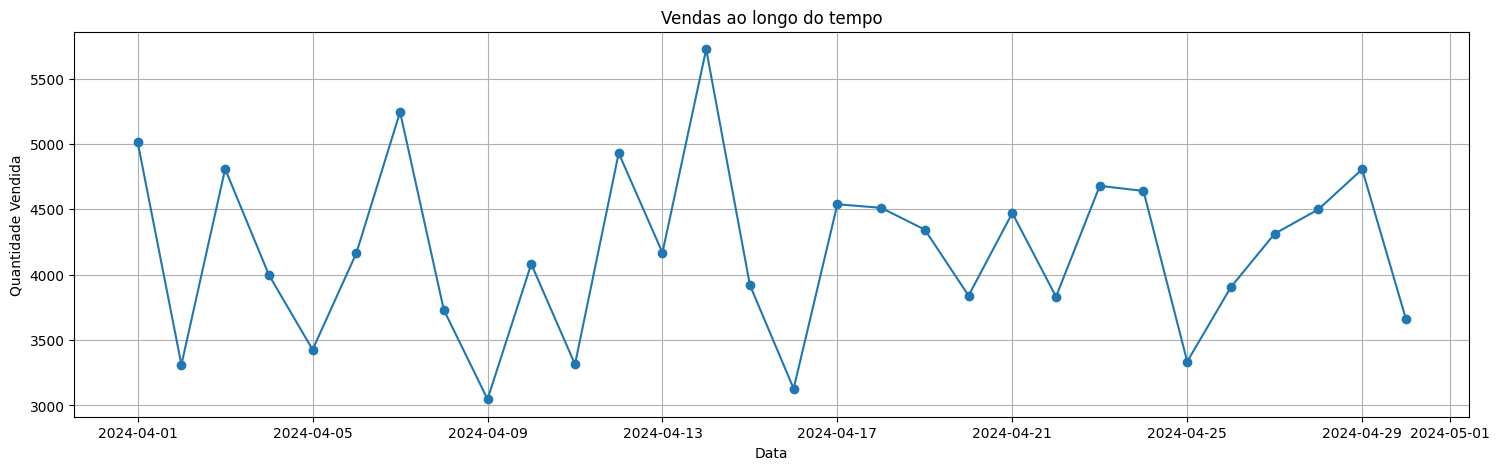

Análise de desempenho de produtos:
nome
Produto 1       2170
Produto 10     28444
Produto 100    12223
Produto 101     4071
Produto 102     7082
               ...  
Produto 94     17539
Produto 95     25358
Produto 96     10158
Produto 98      9767
Produto 99      1670
Name: valor_total, Length: 488, dtype: int64


In [2]:
# Importando a biblioteca pandas como pd e a biblioteca matplotlib.pyplot como plt
import pandas as pd
import matplotlib.pyplot as plt

# Lendo um arquivo CSV chamado 'data_warehouse.csv' em um DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupando o DataFrame por nome do produto e calculando a soma de 'quantidade' e 'valor_total' para cada produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por produto
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupando o DataFrame por categoria do produto e calculando a soma de 'quantidade' e 'valor_total' para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por categoria de produto
print("Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o formato datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Agrupando o DataFrame por data e calculando a soma de 'quantidade' e 'valor_total' para cada data
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de tendências temporais
print("Análise de tendências temporais:")
print(vendas_por_data)

# Criando um gráfico de vendas ao longo do tempo
plt.figure(figsize=(18, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupando o DataFrame por nome do produto e calculando a soma de 'valor_total' para cada produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()

# Imprimindo a análise de desempenho de produtos
print("Análise de desempenho de produtos:")
print(desempenho_produto)

In [3]:
from sqlalchemy import create_engine
import pandas as pd
import os

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Verifica se o diretório 'data_lake' existe; se não, cria o diretório
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos a serem criados e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Loop para gerar dados aleatórios e salvar em CSV
for i in range(1, num_files + 1):
    # Gera dados aleatórios para cada arquivo
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame com os dados gerados
    df = pd.DataFrame(data)

    # Salva o DataFrame em um arquivo CSV no diretório 'data_lake' e adiciona ao banco de dados
    file_name = f'data_lake/dados_{i}.csv'
    df.to_csv(file_name, index=False)
    table_name = file_name.split('/')[-1].split('.')[0]
    df.to_sql(table_name, engine, if_exists='replace', index=False)

    # Imprime os primeiros registros do DataFrame salvo no arquivo CSV
    print(f"\nDados do arquivo {file_name}:\n")
    print(df.head())

engine.dispose()



Dados do arquivo data_lake/dados_1.csv:

   coluna1   coluna2 coluna3
0       12 -0.743817       A
1       69 -0.283925       A
2       83  1.332533       A
3       62  1.027135       A
4       36  0.779193       B

Dados do arquivo data_lake/dados_2.csv:

   coluna1   coluna2 coluna3
0       27  0.380519       B
1       14 -0.852885       B
2       72 -1.713522       A
3       32  0.358275       A
4       30  0.720327       B

Dados do arquivo data_lake/dados_3.csv:

   coluna1   coluna2 coluna3
0       79  0.541067       B
1       89 -1.009447       A
2       35 -1.248641       B
3       89 -0.201192       A
4       77 -0.666074       C

Dados do arquivo data_lake/dados_4.csv:

   coluna1   coluna2 coluna3
0       70 -1.278080       B
1       58 -1.593397       C
2       96 -0.487750       C
3       41 -1.153137       C
4       62 -0.529184       C

Dados do arquivo data_lake/dados_5.csv:

   coluna1   coluna2 coluna3
0       73 -1.466015       B
1       60  0.027913       B
2      

Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       12 -0.743817       A
1       69 -0.283925       A
2       83  1.332533       A
3       62  1.027135       A
4       36  0.779193       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.467000    -0.005106
std      29.233431     1.001443
min       0.000000    -3.427417
25%      24.000000    -0.676266
50%      51.000000    -0.016879
75%      76.000000     0.694436
max      99.000000     2.943632


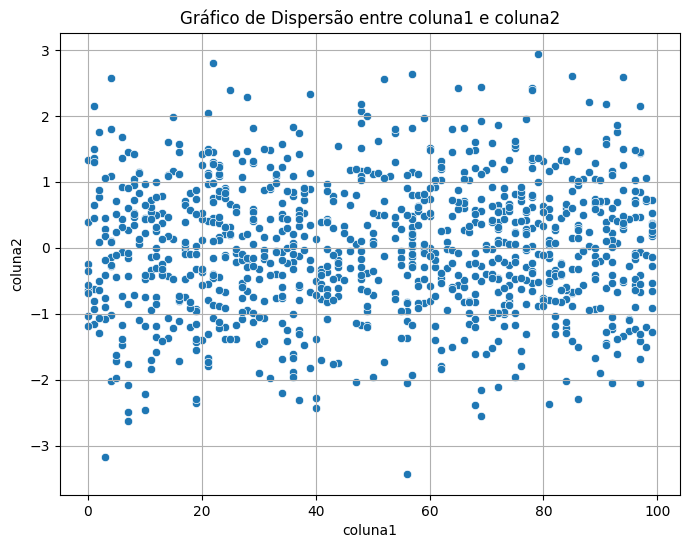

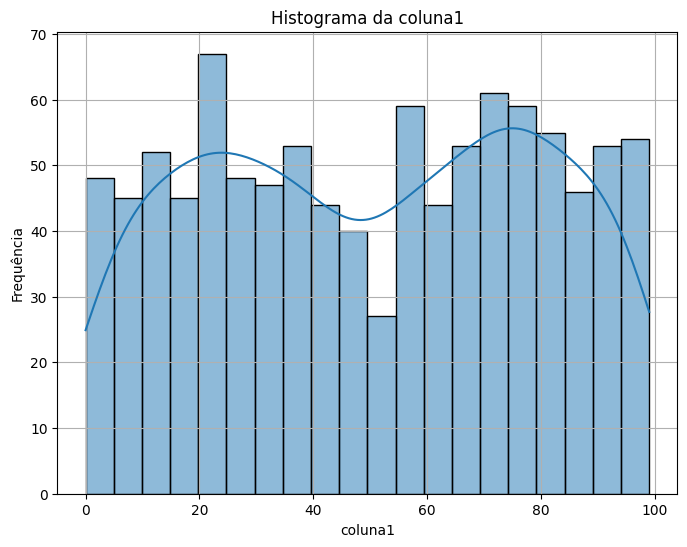

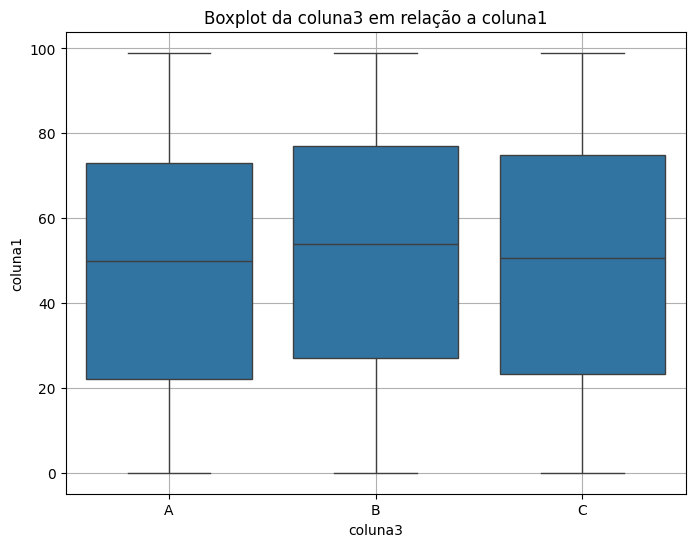

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carregar dados do banco de dados para um DataFrame
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Imprimir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprimir informações sobre o DataFrame, incluindo tipo de dados e memória usada
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprimir um resumo estatístico do DataFrame, incluindo média, desvio padrão, mínimo, máximo, etc.
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Criar um gráfico de dispersão usando as colunas 'coluna1' e 'coluna2' do DataFrame
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criar um histograma da coluna 'coluna1' com 20 bins e KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um boxplot da coluna 'coluna3' em relação à coluna 'coluna1'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
